In [25]:
import numpy as np
import matplotlib.pyplot as plt
import time

## 1 - Mise en Place

Géneration du Probléme-Jouet

In [26]:
def quadratic_problem2d(Lambda):
    A = np.random.rand(2,2)
    Q,R = np.linalg.qr(A)
    L = np.diag(Lambda)
    P = Q.T@L@Q
    # with P definite positive
    q = np.random.rand(2)
    r = np.random.rand(1) 
    return P,q,r

Fonction de Coût

In [27]:
def cost(x):
    
    cout = np.exp(x[0] + 3*x[1] - 0.1) + np.exp(x[0] - 3*x[1] - 0.1) + np.exp(-x[0] - 0.1) 
    
    return cout

Fonction de Gradient

In [28]:
def gradient(x):
    
    grad = np.zeros(2)
    grad[0] = np.exp(x[0] + 3*x[1] - 0.1) + np.exp(x[0] - 3*x[1] - 0.1) - np.exp(-x[0] - 0.1)
    grad[1] = 3*np.exp(x[0] + 3*x[1] - 0.1) - 3*np.exp(x[0] - 3*x[1] - 0.1)
    
    return grad

In [29]:
def hessiene(x):

    hes = np.zeros((2,2))
    hes[0,0] = np.exp(x[0] + 3 * x[1] - 0.1) + np.exp(x[0] - 3 * x[1] - 0.1) + np.exp(-x[0] - 0.1)
    hes[1,1] = 9 * np.exp(x[0] + 3 * x[1] - 0.1) + 9 * np.exp(x[0] - 3 * x[1] - 0.1)
    hes[1,0] = 3 * np.exp(x[0] + 3 * x[1] - 0.1) - 3 * np.exp(x[0] - 3 * x[1] - 0.1)
    hes[0,1] = hes[1,0]

    return hes
    

Backtracking

In [30]:
def Backtracking(fonc, grad, d, x0):
    sig = 1.0
    c = 1e-4
    rho = 0.5
    
    while fonc(x0 + sig*d) > fonc(x0) + c*sig*grad(x0).T @ d:
        sig = rho*sig
    
    sigk = sig
    
    return sigk   

In [31]:
def GoldenSearch(Fonc, x0, direction):
    a = 0
    b = 2
    Ep = 1e-12
    phi = (1+np.sqrt(5))/2
    iter_count = 0
    max_iter = 100
    
    # Lambda function to evaluate the cost function for a given step size sigma
    f = lambda sigma: Fonc(x0 + sigma * direction)
    
    c = a + (b-a)/(phi+1)
    d = b - (b-a)/(phi+1)
       
    while b - a > Ep and iter_count < max_iter:
        if f(c) >= f(d):
            a = c
            c = d
            d = b - (b-a)/(phi+1) 
        else: 
            b = d
            d = c
            c = a + (b-a)/(phi+1) 
        iter_count += 1  
           
    sig = (a + b) / 2       
         
    return sig

Méthode de Newton

In [32]:
def Newton(x0):

    return hessiene(x0)

Méthode de Descente de Gradient

In [33]:
def Gradient_Descent(x0,cost,gradient,step, met):
    n = np.linalg.norm(gradient(x0))
    xlist = [x0]
    flist = [cost(x0)]
    nlist = [n]
    k = 0
    
    while n >= 1e-6 and k < 100000:
        d = - gradient(x0)
        
        if met == 'Pas Constant':
            sigma = step
        elif met == 'Pas Optimal':
            sigma = GoldenSearch(cost, x0, d)
        elif met == 'Backtrack':
            sigma = Backtracking(cost, gradient, d, x0)
        else:
            sigma = Newton(x0)
        
        x0 = x0 + sigma*d
        k = k+1
        n = np.linalg.norm(gradient(x0))
        xlist.append(x0)
        flist.append(cost(x0))
        nlist.append(n)
        
    return xlist,flist,nlist

Visualisation des Résultats

Pas Constant
Temps d'execution (secondes) for test n° 1 :  0.005763053894042969
Temps d'execution (secondes) for test n° 2 :  0.005908966064453125


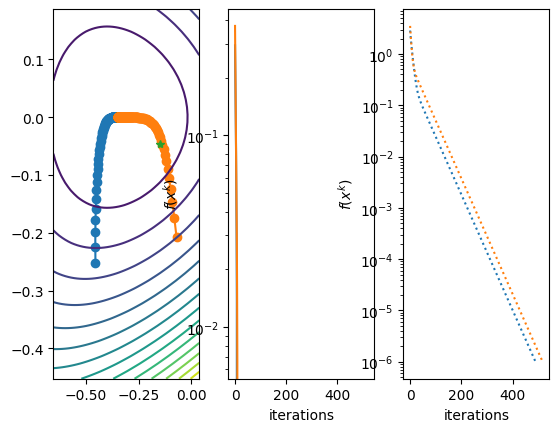

Pas Optimal
Temps d'execution (secondes) for test n° 1 :  0.0016872882843017578
Temps d'execution (secondes) for test n° 2 :  0.00551295280456543


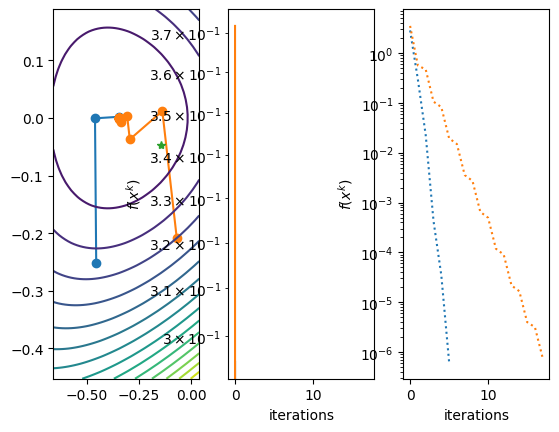

Backtrack
Temps d'execution (secondes) for test n° 1 :  0.0012941360473632812
Temps d'execution (secondes) for test n° 2 :  0.0013179779052734375


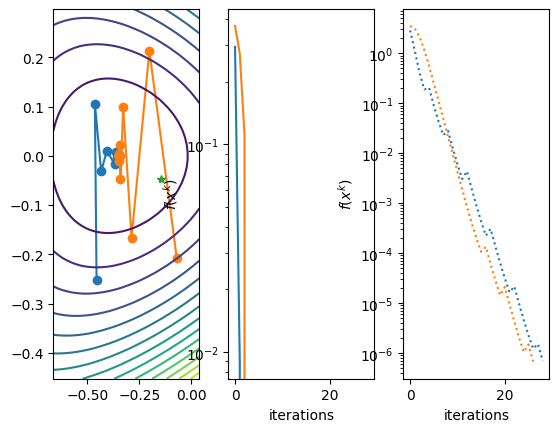

Newton


ValueError: setting an array element with a sequence.

In [34]:
# Definitions de differents Méthodes
MET = np.array(['Newton', 'Pas Constant', 'Pas Optimal', 'Backtrack'])

# Boucle pour chaque Méthode
for met in MET:
    print(met)
    Lambda = np.array((1,2))
    np.random.seed(seed=1)
    P,q,r= quadratic_problem2d(Lambda)
    # check solution existency 
    xstar = -np.dot(np.linalg.inv(P),q)
    fmin  = cost(xstar)

    #grid
    ax= xstar[0]
    bx = xstar[0]
    ay= xstar[1]
    by = xstar[1]

    for test in range(2):
        x0 = np.copy(xstar) + 2.*(np.random.rand(2)-.5)
        #
        start_time = time.time()
        xlist,flist,nlist =  Gradient_Descent(x0,cost,gradient,1e-2, met)
        RunTime = (time.time() - start_time) # Calcul du temps d'execution
        print("Temps d'execution (secondes) for test n°", test+1,  ": ", RunTime)
        xlist = np.asarray(xlist)
        #
        fig = plt.figure(1) 
        plt.subplot(1,3,1)
        plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
    #    #
        ax = np.min((xlist[:,0].min(),ax))-.1
        bx = np.max((xlist[:,0].max(),bx))+.1
        ay = np.min((xlist[:,1].min(),ay))-.1
        by = np.max((xlist[:,1].max(),by))+.1
        
        plt.subplot(1,3,2)
        plt.semilogy(range(len(flist)),flist-fmin+1e-16)
        plt.xlabel('iterations')
        plt.ylabel(r'$f(x^k)$')
        
        plt.subplot(1,3,3)
        plt.semilogy(nlist,':')
        plt.xlabel('iterations')
        plt.ylabel(r'$f(x^k)$')
        
    #    
    xgrid = np.arange(ax,bx,(bx-ax)/50)
    ygrid = np.arange(ay,by,(by-ay)/50)
    X, Y = np.meshgrid(xgrid, ygrid)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

    plt.subplot(1,3,1)
    plt.contour(X, Y, Z,21)

    plt.plot(xstar[0], xstar[1],'*',label='points')
    plt.show()